In [2]:
%matplotlib inline

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import L1L2

# Training and improving neural networks
## Live Demo

In [6]:
fashon_data = pd.read_csv("data/train42000.csv")

In [17]:
fashon_data.sample(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38521,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_sampe = fashon_data.sample(10)

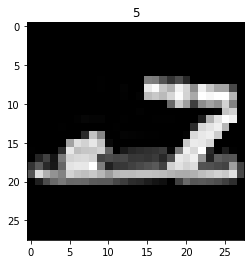

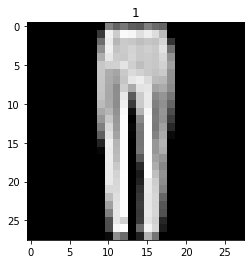

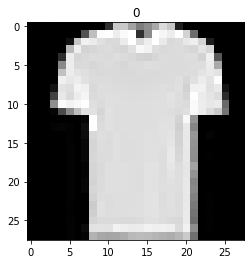

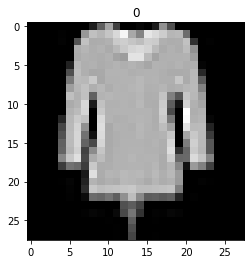

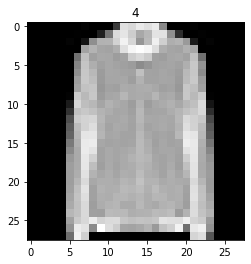

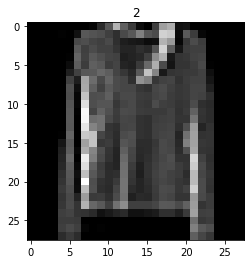

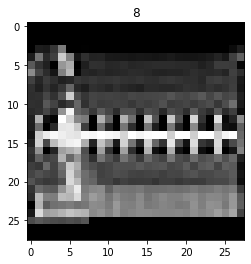

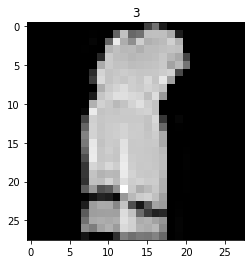

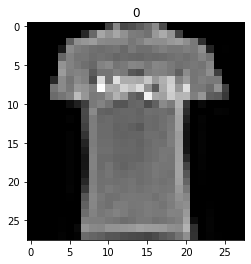

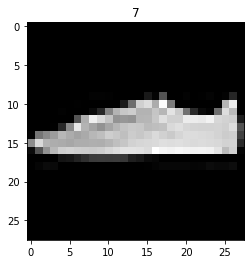

In [16]:
for index, row in test_sampe.iterrows():
    row_values = row.values
    label = row_values[0]
    row_values = row_values[1:].reshape((28, 28))
    
    plt.imshow(row_values, cmap = "gray")
    plt.title(label)
    plt.show()

In [18]:
fashion_attributes = fashon_data.drop("label", axis = 1).values
fashion_labels = fashon_data.label.values
# with VALUES we will use numpay arrays and will be easier to Scale them

#### Scale 0-1(255)

In [19]:
fashion_attributes = fashion_attributes.astype(np.float64) / 255.0
print(fashion_attributes.min())
print(fashion_attributes.max())

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64
pixel0      0.062745
pixel1      0.176471
pixel2      0.854902
pixel3      0.725490
pixel4      0.890196
              ...   
pixel779    1.000000
pixel780    1.000000
pixel781    1.000000
pixel782    1.000000
pixel783    0.666667
Length: 784, dtype: float64


In [23]:
NUM_COLUMNS = fashion_attributes.shape[1]
NUM_LABELS = len(set(fashion_labels))

In [24]:
nn_model = Sequential([
    Input(NUM_COLUMNS),
    Dense(20, activation = "relu"), # when activation functions is 0 this is linear regression
    Dense(10, activation = "relu"),    
    Dense(30, activation = "relu"),
    Dense(NUM_LABELS, activation="softmax")# 0-regression in last layer; sigmod - for classification of two classes
])

In [22]:
len(set(fashion_labels)) # how mych lables are used in this set in for the last layer

10

In [25]:
nn_model.summary() # rank = 2 this is Output shape

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 16,550
Trainable params: 16,550
Non-trainable params: 0
_________________________________________________________________


In [28]:
nn_model.compile(optimizer = "adam" ,
                 loss = "sparse_categorical_crossentropy") #when lables are 0, 1, 2, etc 

In [26]:
tf.one_hot(fashion_labels, depth= 10) # this way categorical cross-entropy is needed for LOSS

<tf.Tensor: shape=(42000, 10), dtype=float32, numpy=
array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [29]:
nn_model.fit(fashion_attributes, fashion_labels, epochs = 20)

Train on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 5s 118us/sample - loss: 0.6855
Epoch 2/20
42000/42000 [==============================] - 3s 80us/sample - loss: 0.4528
Epoch 3/20
42000/42000 [==============================] - 3s 80us/sample - loss: 0.4151
Epoch 4/20
42000/42000 [==============================] - 3s 80us/sample - loss: 0.3936
Epoch 5/20
42000/42000 [==============================] - 3s 81us/sample - loss: 0.3768
Epoch 6/20
42000/42000 [==============================] - 3s 80us/sample - loss: 0.3642
Epoch 7/20
42000/42000 [==============================] - 3s 77us/sample - loss: 0.3512
Epoch 8/20
42000/42000 [==============================] - 3s 79us/sample - loss: 0.3447
Epoch 9/20
42000/42000 [==============================] - 3s 80us/sample - loss: 0.3365
Epoch 10/20
42000/42000 [==============================] - 3s 79us/sample - loss: 0.3283
Epoch 11/20
42000/42000 [==============================] - 3s 78us/sample - loss: 0.3244
Epoch 

In [ ]:
# single EPOCHE is one forward and one backward cycle

## Reguralization - L2 or L1

In [30]:
nn_model.layers[1].weights

[<tf.Variable 'dense_1/kernel:0' shape=(20, 10) dtype=float32, numpy=
 array([[ 0.6996608 ,  0.01372772, -0.01310254,  0.07710408, -0.6874222 ,
         -1.0363817 ,  0.01926682, -0.6829894 ,  0.42770526,  0.5348778 ],
        [ 0.43915227, -0.29717323, -0.10500803, -0.32281446,  0.01654229,
          0.04984588,  0.33017388, -0.27192137,  0.25183603, -0.08457375],
        [ 0.09470236, -0.01155088,  0.20251308, -0.425558  ,  0.08368323,
          0.17194273, -0.53869635,  0.15507187,  0.24148281,  0.1428442 ],
        [ 0.3898066 ,  0.2719354 ,  0.04540868,  0.09918465,  0.48302785,
         -0.34956902,  0.32206097,  0.2134435 ,  0.2661687 , -0.48185727],
        [-0.19500403,  0.4620457 ,  0.7246656 , -0.33222914,  0.04057971,
          0.31176838, -0.41132313,  0.6952442 ,  0.05767952,  0.06456292],
        [-0.16678414, -0.5099452 , -0.5572084 ,  0.5391859 , -0.10845716,
         -0.11715767,  0.50258946,  0.47283077, -0.35767448, -0.07261884],
        [-0.51479286,  0.19867685, -

In [32]:
reg = L1L2(l1=0.01, l2=0.0001)

In [ ]:
nn_model = Sequential([
    Input(NUM_COLUMNS),      # regul - kernel, reg-bias, activity_regularizer="" reg - result  
    Dense(20, activation = "relu", kernel_regularizer = reg, bias_regularizer = reg), 
    Dropout(0.1,)
    Dense(10, activation = "relu", kernel_regularizer = reg, bias_regularizer = reg),  
    Dropout(0.2) # this means 20% will be "deleted"
    Dense(30, activation = "relu", kernel_regularizer = reg, bias_regularizer = reg),
    Dense(NUM_LABELS, activation="softmax", kernel_regularizer = reg, bias_regularizer = reg)
])

In [ ]:
# DROPOUT(0-1)1 is 100%. regularization is when we "kill" some of the neurons randonly on each epoches
# DROPUT is active only when training. On test the whole network is included

In [37]:
nn_model = Sequential([
    Input(NUM_COLUMNS),     
    Dense(20, activation = "relu"), 
    Dropout(0.1,),
    Dense(10, activation = "relu"),  
    Dropout(0.2), # this means 20% will be "deleted"
    Dense(30, activation = "relu"),
    Dropout(0.1,),
    Dense(NUM_LABELS, activation="softmax", kernel_regularizer = reg, bias_regularizer = reg)
])

In [38]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               